In [1]:
!pip install requests

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
import requests
from io import BytesIO
import numpy as np

In [70]:
plt.figure(figsize=(19,4))
response = requests.get('https://homepages.cae.wisc.edu/~ece533/images/fruits.png')
img = Image.open(BytesIO(response.content)).convert()

plt.figure(figsize=(19,4))
response = requests.get('https://homepages.cae.wisc.edu/~ece533/images/fruits.png')
img1 = Image.open(BytesIO(response.content)).convert()

plt.figure(figsize=(19,4))
response = requests.get('https://homepages.cae.wisc.edu/~ece533/images/fruits.png')
img2 = Image.open(BytesIO(response.content)).convert()

<Figure size 1368x288 with 0 Axes>

<Figure size 1368x288 with 0 Axes>

<Figure size 1368x288 with 0 Axes>

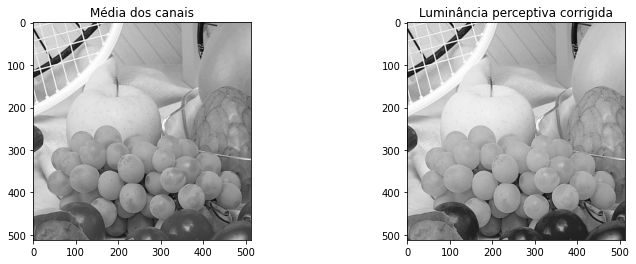

In [80]:
# Tons de cinza pela média dos canais
img_arr = np.array(img)

red = img_arr[:,:,0]
green = img_arr[:,:,1]
blue = img_arr[:,:,2]

img_gray = np.mean(img_arr, axis=2)

# Tons de cinza pela média dos canais
img1_arr = np.array(img1)

red1 = img1_arr[:,:,0]
green1 = img1_arr[:,:,1]
blue1 = img1_arr[:,:,2]

y1 = (0.2126 * red1) + (0.7152 * green1) + (0.0722 * blue1)

# Plots
plt.figure(figsize=(19,4))

plt.subplot(131)
plt.title("Média dos canais")
plt.imshow(Image.fromarray(img_gray))

plt.subplot(132)
plt.title("Luminância perceptiva corrigida")
plt.imshow(Image.fromarray(y1))


(array([ 1810., 12637.,  9525.,  9560., 13229., 31452., 74083., 51509.,
        35929., 22410.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

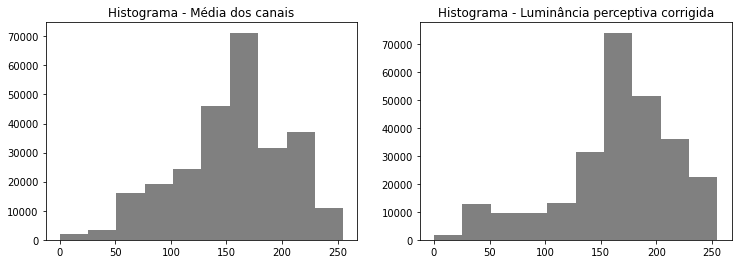

In [82]:
plt.figure(figsize=(19,4))

plt.subplot(131)
plt.title("Histograma - Média dos canais")
plt.hist(img_gray.ravel(), color='gray')

plt.subplot(132)
plt.title("Histograma - Luminância perceptiva corrigida")
plt.hist(y1.ravel(), color='gray')

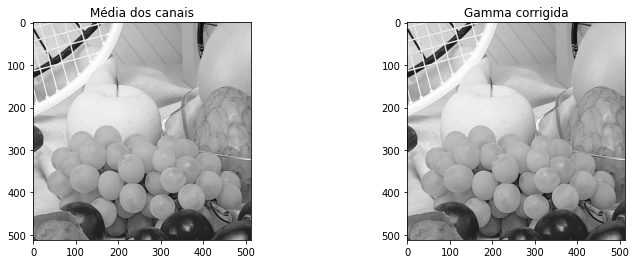

In [101]:
## Luminância perceptiva corrigida
img1_arr = np.array(img1)

red1 = img1_arr[:,:,0]
green1 = img1_arr[:,:,1]
blue1 = img1_arr[:,:,2]

y1 = (0.2126 * red1) + (0.7152 * green1) + (0.0722 * blue1)

## Gamma corrigida
img2_arr = np.array(img2)

red2 = img2_arr[:,:,0]
green2 = img2_arr[:,:,1]
blue2 = img2_arr[:,:,2]

y2 = (0.2126 * red2) + (0.7152 * green2) + (0.0722 * blue2)

if (y2.all() <= 0.04045):
  (y2/12.92)
elif (y2.all() > 0.04045):
  ((y2 + 0.055)/1.055)^2.4

c = y2

## Plots
plt.figure(figsize=(19,4))

plt.subplot(131)
plt.title("Média dos canais")
plt.imshow(Image.fromarray(y1))

plt.subplot(132)
plt.title("Gamma corrigida")
plt.imshow(Image.fromarray(c))

(array([ 1810., 12637.,  9525.,  9560., 13229., 31452., 74083., 51509.,
        35929., 22410.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

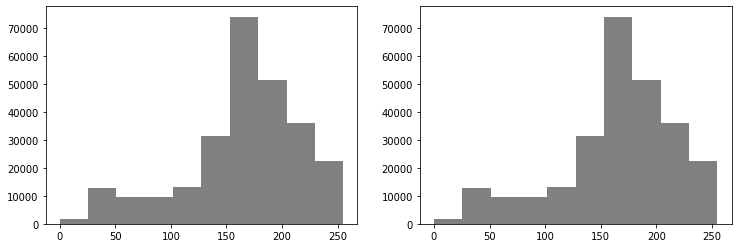

In [97]:
plt.figure(figsize=(19,4))

plt.subplot(131)
plt.hist(y1.ravel(), color='gray')
plt.subplot(132)
plt.hist(c.ravel(), color='gray')